In [7]:
# pip install jupyterlab-system-monitor

In [95]:
#!pip install matplotlib

In [1]:
%load_ext autoreload

%reload_ext autoreload

In [1]:
import pricing_ai
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
import warnings
import calendar
import pandas as pd
import matplotlib.pyplot as plt
import pydata_google_auth
from google.cloud import bigquery

warnings.simplefilter('ignore')

def print_shape(df):
    print(df.shape)

def get_cilent():
    credentials = pydata_google_auth.get_user_credentials(
    ['https://www.googleapis.com/auth/bigquery'],
    )
    client = bigquery.Client(credentials=credentials, project='ps-data-analytics-platform')
    return client

def get_sql(sql_path: str='sql/contract.sql'):
    with open (sql_path, 'r') as sql:
        sql = sql.read()
    return sql

def to_datetime(df: pd.DataFrame, col: str=None):
    if not col:
        col = 'delete_date'
    df[col] = pd.to_datetime(df[col], errors='coerce')
    df = df.dropna(subset=col)
    df = df.sort_values(by=col, ascending=False).reset_index(drop=True)
    return df

def get_df(sql, client):
    df = client.query(sql).to_dataframe()
    return df

def extract_yyyy(df, datetime_col: str='delete_date'):
    df['year'] = df[datetime_col].dt.year
    return df

def extract_mm(df, datetime_col: str='delete_date'):
    df['month'] = df[datetime_col].dt.month
    return df

def extract_dd(df, datetime_col: str='delete_date'):
    df['day'] = df[datetime_col].dt.day
    return df

def extract_dayofweek(df, datetime_col: str='delete_date'):
    df['dayofweek'] = df[datetime_col].dt.day_of_week.apply(lambda dayofweek: calendar.day_name[dayofweek])
    df['dayofweek'] = df[datetime_col].dt.day_of_week.astype(str) + '.' +df['dayofweek']
    return df


In [3]:
client = pricing_ai.get_cilent()
sql = pricing_ai.get_sql()
df = pricing_ai.get_df(sql, client)

In [4]:
df = pricing_ai.to_datetime(df, 'delete_date')
df = pricing_ai.extract_yyyy(df)
df = pricing_ai.extract_mm(df)
df = pricing_ai.extract_dd(df)
df = pricing_ai.extract_dayofweek(df)

In [6]:
df.stock_id.nunique()

969454

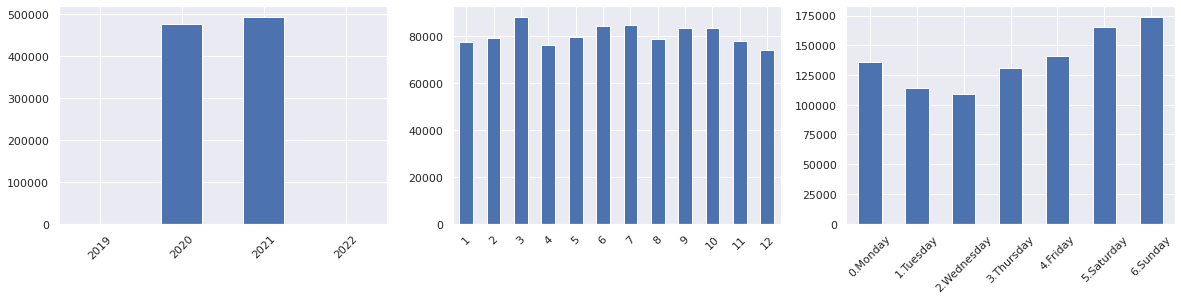

In [14]:
fig, axes = plt.subplots(1,3, figsize=(20, 4))
df.year.value_counts().sort_index().plot.bar(ax=axes[0])
df.month.value_counts().sort_index().plot.bar(ax=axes[1])
df.dayofweek.value_counts().sort_index().plot.bar(ax=axes[2])

for ax in axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

plt.show()

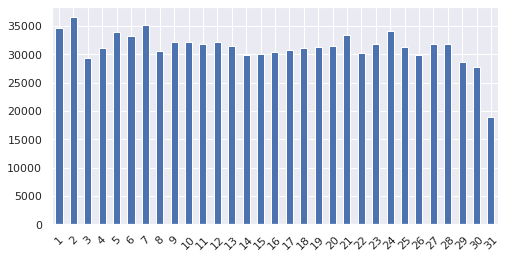

In [17]:
fig, axes = plt.subplots(1,1, figsize=(8, 4))
df.day.value_counts().sort_index().plot.bar(ax=axes)

for tick in axes.get_xticklabels():
        tick.set_rotation(45)

In [160]:
df

,stock_id,delete_date,year,month,day,dayofweek
0,0520289A30210910W001,2022-01-01,2022,1,1,5.Saturday
1,0803383A30210530W002,2022-01-01,2022,1,1,5.Saturday
2,0508760A20211112J007,2022-01-01,2022,1,1,5.Saturday
3,0505586A20211015J001,2022-01-01,2022,1,1,5.Saturday
4,0507811A30211216W002,2022-01-01,2022,1,1,5.Saturday
...,...,...,...,...,...,...
969449,1157051A30191031W001,2019-12-31,2019,12,31,1.Tuesday
969450,0402357A30191027W001,2019-12-31,2019,12,31,1.Tuesday
969451,0508703A30191222W003,2019-12-31,2019,12,31,1.Tuesday
969452,0804255A30191023W001,2019-12-31,2019,12,31,1.Tuesday
